### Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [67]:
#!pip install tensorflow
#!pip install pydot

In [4]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import regularizers


2024-07-10 18:35:06.084350: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [87]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')
#UpGrad: https://drive.google.com/file/d/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs/view?usp=sharing
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166


In [89]:
# from google.colab import drive
# # Unmount Google Drive
# drive.flush_and_unmount()

In [51]:
# from google.colab import drive
# # Mount Google Drive
# drive.mount('/content/drive')


In [1]:
import os
import zipfile

# Path to your zip file on your local machine
zip_path = 'CNN_assignment.zip'  

# Extract the contents of the zip file
extract_path = 'Skin cancer ISIC The International Skin Imaging Collaboration' 


os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


extracted_folder = extract_path

# Example: List files in Train and Test folders after extraction
train_folder = os.path.join(extracted_folder, 'Train')
test_folder = os.path.join(extracted_folder, 'Test')

print("Files in Train folder:")
print(os.listdir(train_folder))

print("\nFiles in Test folder:")
print(os.listdir(test_folder))


Files in Train folder:
['.DS_Store', 'melanoma', 'pigmented benign keratosis', 'nevus', 'basal cell carcinoma', 'actinic keratosis', 'squamous cell carcinoma', 'vascular lesion', 'seborrheic keratosis', 'dermatofibroma']

Files in Test folder:
['.DS_Store', 'melanoma', 'pigmented benign keratosis', 'nevus', 'basal cell carcinoma', 'actinic keratosis', 'squamous cell carcinoma', 'vascular lesion', 'seborrheic keratosis', 'dermatofibroma']


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
# Define the paths after extracting the zip file

data_dir_train = pathlib.Path(os.path.join(extract_path, 'Train'))
data_dir_test = pathlib.Path(os.path.join(extract_path, 'Test'))


In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [13]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [14]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  label_mode='categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [15]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  label_mode='categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [16]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(len(class_names))
print(class_names)

9
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

2024-07-07 18:30:54.789994: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


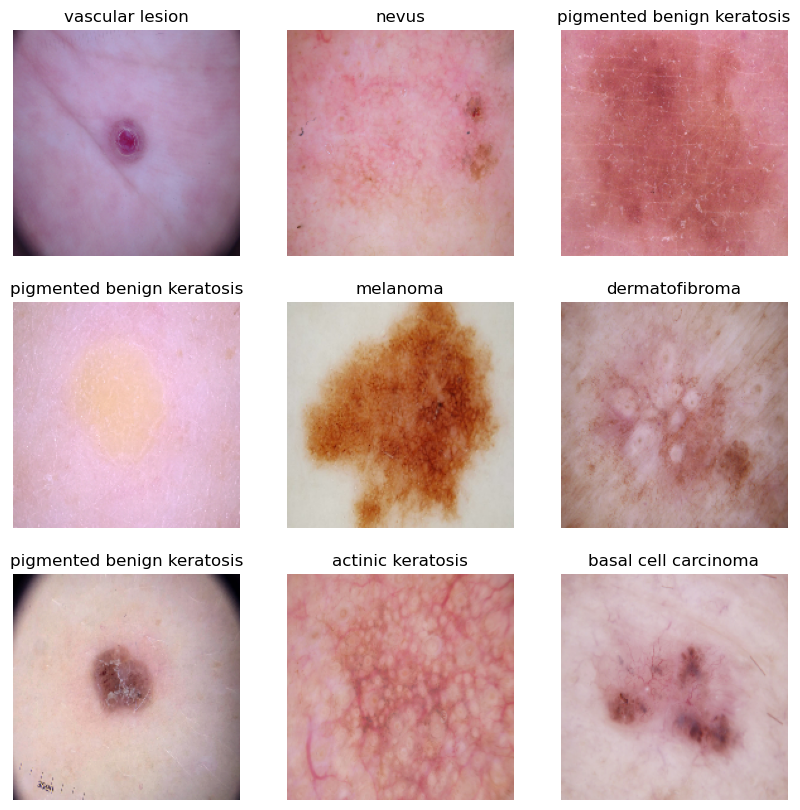

In [108]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    # Convert the label Tensor to a NumPy array and extract the index of the highest probability class
    predicted_label_index = np.argmax(labels[i].numpy())
    plt.title(class_names[predicted_label_index]) # Use the integer index to access class_names
    plt.axis("off")

In [110]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32, 9)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [114]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [117]:
# Assuming train_ds is your TensorFlow Dataset object containing (image, label) pairs

# Define normalization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Apply normalization to your dataset
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

# Example: Extract a batch of normalized images
image_batch, labels_batch = next(iter(normalized_ds))

# Example: Check the range of pixel values in the first image of the batch
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))  # Should print (0.0, 1.0) indicating values are normalized


0.007943949 0.84475565


In [119]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# CNN Model Architecture
model = Sequential()

# Rescaling layer to normalize pixel values to [0,1]
model.add(tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)))

# First Convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer with 25% fraction of the input units to drop
model.add(Dropout(0.25))

# Flatten layer
model.add(Flatten())

# Dense layer
model.add(Dense(128, activation='relu'))

# Dropout layer with 50% fraction of the input units to drop
model.add(Dropout(0.5))

# Output Dense layer with softmax activation function
model.add(Dense(len(class_names), activation='softmax'))

# Print model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [121]:
# Visualise the model
tf.keras.utils.plot_model(model = model , rankdir="TB", dpi=72, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [123]:
#Compile the Model

#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])


### Train the model

In [126]:
len(class_names)

9

In [128]:
epochs = 20
batch_size = 32
history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 214ms/step - accuracy: 0.1959 - loss: 2.4783 - val_accuracy: 0.2617 - val_loss: 1.9765
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - accuracy: 0.2477 - loss: 1.9785 - val_accuracy: 0.3468 - val_loss: 1.7996
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - accuracy: 0.3058 - loss: 1.8476 - val_accuracy: 0.3915 - val_loss: 1.7255
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 208ms/step - accuracy: 0.3569 - loss: 1.7684 - val_accuracy: 0.3848 - val_loss: 1.6606
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 210ms/step - accuracy: 0.3977 - loss: 1.6455 - val_accuracy: 0.4787 - val_loss: 1.5189
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 211ms/step - accuracy: 0.4649 - loss: 1.5518 - val_accuracy: 0.5056 - val_loss: 1.4525
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 210ms/step - accuracy: 0.4374 - loss: 1.5608 - val_accuracy: 0.5056 - val_loss: 1.4691
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 210ms/step - accuracy: 0.4889 - loss: 1.4762 - val_accu

### Visualizing training results

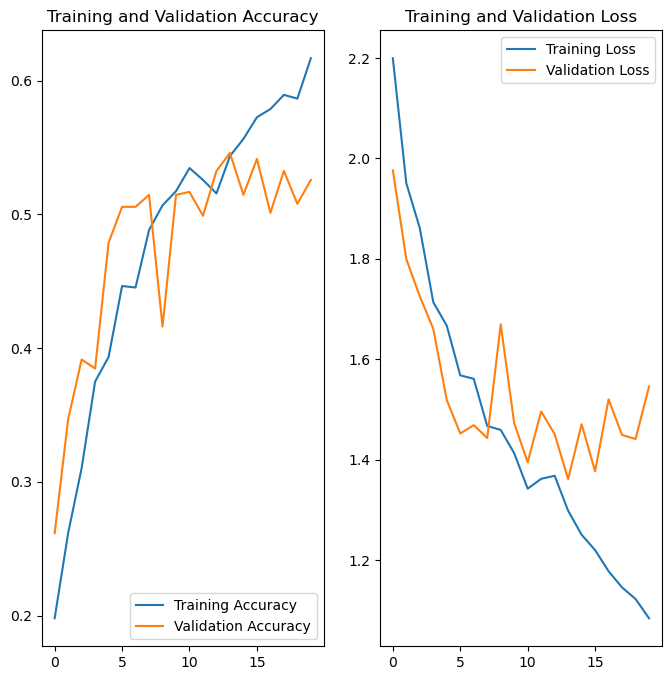

In [130]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

<div style="background-color: #ffc0cb; padding: 10px;">
<b>Findings:</b><br>
<ul>
<li>As the training accuracy increases linearly over time, whereas the validation accuracy stalls at 50%.</li>
<li>The training loss decreases with epochs, but the validation loss increases.</li>
<li>The plots indicate a significant gap between training and validation accuracy, with the model achieving around 50% accuracy on the validation set.</li>
<li>The noticeable difference in accuracy between training and validation sets suggests overfitting.</li>
</ul>
</div>


In [138]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values to [0,1]
    rotation_range=10,          # Rotate images randomly by up to 10 degrees
    width_shift_range=0.1,      # Shift images horizontally by up to 10% of the width
    height_shift_range=0.1,     # Shift images vertically by up to 10% of the height
    shear_range=0.1,            # Apply shear transformation
    zoom_range=0.1,             # Zoom in/out on images by 10%
    horizontal_flip=True,       # Flip images horizontally
    fill_mode='nearest'         # Fill in missing pixels with the nearest value
)


In [148]:
# Verify image shapes
for images, labels in train_ds.take(1):
    print(f"Image batch shape (train_ds): {images.shape}")
for images, labels in val_ds.take(1):
    print(f"Image batch shape (val_ds): {images.shape}")

Image batch shape (train_ds): (32, 180, 180, 3)
Image batch shape (val_ds): (32, 180, 180, 3)


2024-07-07 18:47:14.659262: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-07-07 18:47:14.669088: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [190]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

image_class = ['nevus','melanoma','basal_cell_caricoma','actinic_keratosis','vasc_lesion','dermatofibroma', 'pigmented_keratosis', 'seborrheic_keratosis', 'squamous_carci']

train_batches = datagen.flow_from_directory(data_dir_train, 
    target_size = (180,180),
    classes = image_class,
    batch_size = 64
 )

valid_batches = datagen.flow_from_directory(data_dir_test, 
    target_size = (180,180),
    classes = image_class,
    batch_size = 64
)

Found 2390 images belonging to 9 classes.
Found 48 images belonging to 9 classes.


2024-07-07 20:51:14.746350: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


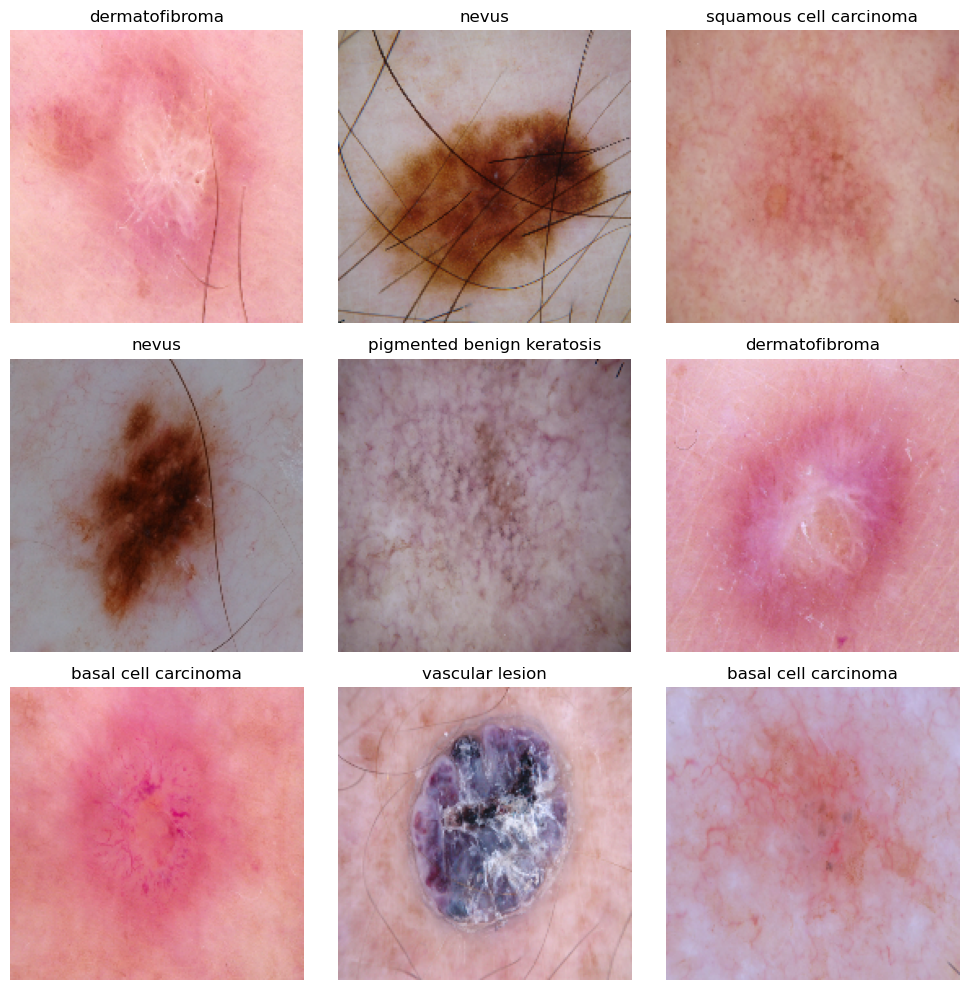

In [200]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # Convert one-hot encoded label to integer
        label_value = tf.argmax(labels[i]).numpy()
        
        plt.title(class_names[label_value])  # Use the integer value as an index
        plt.axis("off")

plt.tight_layout()
plt.show()


### Todo:
### Create the model, compile and train the model


In [224]:
# CNN Model Architecture
model = Sequential()

# Rescaling layer to normalize pixel values to [0,1]
model.add(tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)))

# First Convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second Convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third Convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer with 25% fraction of the input units to drop
model.add(Dropout(0.25))

# Flatten layer
model.add(Flatten())

# Dense layer
model.add(Dense(512, activation='relu'))

# Dropout layer with 50% fraction of the input units to drop
model.add(Dropout(0.5))

# Output Dense layer with softmax activation function
model.add(Dense(len(class_names), activation='softmax'))

# Print model summary
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,312,777 (100.38 MB)

 Trainable params: 26,312,777 (100.38 MB)

 Non-trainable params: 0 (0.00 B)

In [226]:
# Visualise the model
tf.keras.utils.plot_model(model = model , rankdir="TB", dpi=72, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


### Compiling the model

In [232]:
## Your code goes here
#optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])


### Training the model

In [234]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
batch_size = 32
history = model.fit(
  train_batches,
  batch_size=batch_size,
  validation_data=valid_batches,
  epochs=epochs
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 750ms/step - accuracy: 0.3558 - loss: 1.9960 - val_accuracy: 0.3958 - val_loss: 1.1876
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 728ms/step - accuracy: 0.5772 - loss: 0.8913 - val_accuracy: 0.4792 - val_loss: 1.1508
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 700ms/step - accuracy: 0.6965 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 1.1460
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 720ms/step - accuracy: 0.7091 - loss: 0.6756 - val_accuracy: 0.4792 - val_loss: 1.1876
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 719ms/step - accuracy: 0.7003 - loss: 0.6519 - val_accuracy: 0.5000 - val_loss: 1.2044
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 710ms/step - accuracy: 0.7149 - loss: 0.6339 - val_accuracy: 0.5417 - val_loss: 1.1832
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 713ms/step - accuracy: 0.7260 - loss: 0.6143 - val_accuracy: 0.5417 - val_loss: 1.0624
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 702ms/step - accuracy: 0.7398 - loss: 0.5716 - val_accu

### Visualizing the results

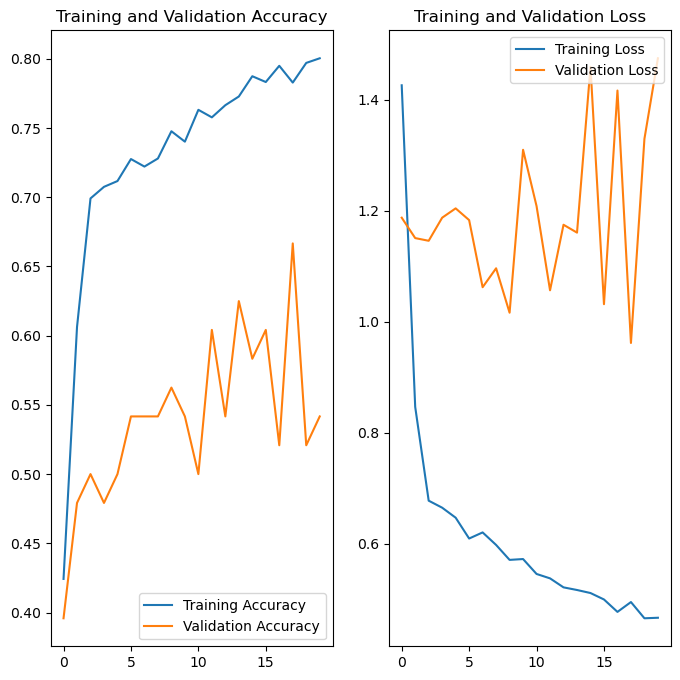

In [236]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<div style="background-color: #ffc0cb; padding: 10px;">
<b>Findings:</b><br>
<ul>
<li>As the training accuracy increases linearly over time, where as the validation accuracy increases and stall at 55% accuracy in training process.</li>
<li>As the training loss decreases with epochs the validation loss decreases and stalls.</li>
<li>The noticeable difference in accuracy between training and validation sets suggests overfitting.</li>
</ul>
</div>


In [258]:
# CNN Model Architecture with BatchNormalization and L2 Regularization

model = Sequential()

# Rescaling layer to normalize pixel values to [0,1]
model.add(tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)))

# First Convolutional layer with BatchNormalization and L2 regularization
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second Convolutional layer with BatchNormalization and L2 regularization
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third Convolutional layer with BatchNormalization and L2 regularization
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten layer
model.add(Flatten())

# Dense layer with L2 regularization
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

# Output Dense layer with softmax activation function
model.add(Dense(len(class_names), activation='softmax'))

# Print model summary
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_12 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,312,777 (100.38 MB)

 Trainable params: 26,312,777 (100.38 MB)

 Non-trainable params: 0 (0.00 B)

In [260]:
## Your code goes here
#optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])


In [262]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
batch_size = 32
history = model.fit(
  train_batches,
  batch_size=batch_size,
  validation_data=valid_batches,
  epochs=epochs
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 753ms/step - accuracy: 0.3235 - loss: 12.8284 - val_accuracy: 0.3542 - val_loss: 5.2096
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 705ms/step - accuracy: 0.4810 - loss: 4.1061 - val_accuracy: 0.4167 - val_loss: 2.9164
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 702ms/step - accuracy: 0.6767 - loss: 2.2186 - val_accuracy: 0.3750 - val_loss: 2.4522
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 704ms/step - accuracy: 0.6763 - loss: 1.6868 - val_accuracy: 0.4375 - val_loss: 2.0804
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 691ms/step - accuracy: 0.6622 - loss: 1.4988 - val_accuracy: 0.4792 - val_loss: 1.9473
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 701ms/step - accuracy: 0.6832 - loss: 1.3540 - val_accuracy: 0.4583 - val_loss: 1.7981
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 708ms/step - accuracy: 0.6917 - loss: 1.2943 - val_accuracy: 0.5000 - val_loss: 1.6449
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 707ms/step - accuracy: 0.7137 - loss: 1.1986 - val_acc

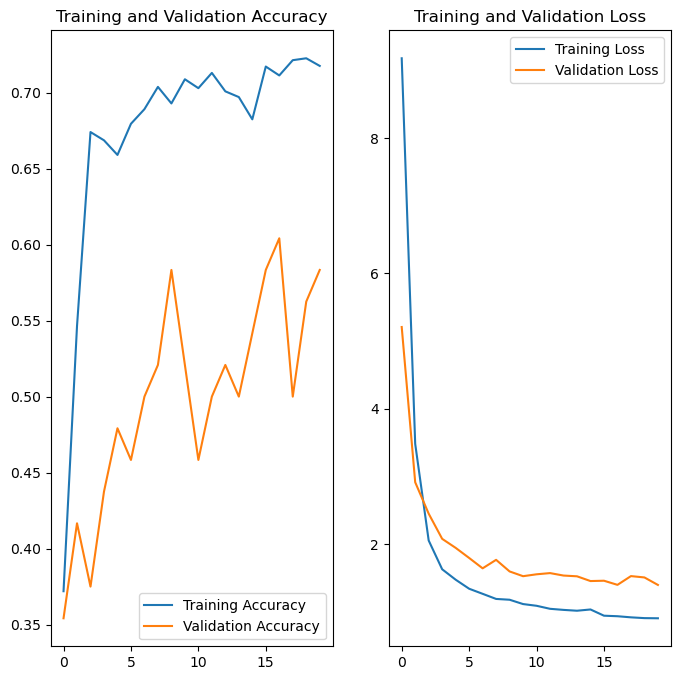

In [266]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<div style="background-color: #ffc0cb; padding: 10px;">
<b>Findings:</b><br>
<ul>
<li>As the training accuracy increases linearly over time, where as the validation accuracy increases and stall at 55% accuracy in training process.</li>
<li>As the training loss decreases with epochs the validation loss decreases.</li>
<li>The difference in accuracy between training and validation accuracy is very less.</li>
</ul>
</div>


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


In [402]:
for i in range(len(class_names)):
  print(class_names[i],' - ',len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))))

actinic keratosis  -  114
basal cell carcinoma  -  376
dermatofibroma  -  95
melanoma  -  438
nevus  -  357
pigmented benign keratosis  -  462
seborrheic keratosis  -  77
squamous cell carcinoma  -  181
vascular lesion  -  139


<div style="background-color: #add8e6; padding: 10px;">
<b>Findings:</b><br>
<ul>
<li>Which class has the least number of samples? - seborrheic keratosis  -  77</li>
<li>Which classes dominate the data in terms proportionate number of samples? - pigmented benign keratosis  -  462</li>
</ul>
</div>


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [10]:
!pip install Augmentor


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [174]:
path_to_training_dataset = pathlib.Path(extract_path) / 'Train'

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset.joinpath(i))  # Use joinpath() to append the class name
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  # Sample 500 images per class

Initialised with 114 image(s) found.
Output directory set to /Users/atanudutta/Downloads/Python/21 - Melanoma Detection Assignment//Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2AF8384D0>: 100%|█|


Initialised with 376 image(s) found.
Output directory set to /Users/atanudutta/Downloads/Python/21 - Melanoma Detection Assignment//Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2DE4C97C0>: 100%|█|


Initialised with 95 image(s) found.
Output directory set to /Users/atanudutta/Downloads/Python/21 - Melanoma Detection Assignment//Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2DE3A6E40>: 100%|█|


Initialised with 438 image(s) found.
Output directory set to /Users/atanudutta/Downloads/Python/21 - Melanoma Detection Assignment//Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x2B6F5D220>: 100%|


Initialised with 357 image(s) found.
Output directory set to /Users/atanudutta/Downloads/Python/21 - Melanoma Detection Assignment//Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1019x717 at 0x2DE481A90>: 100%|█


Initialised with 462 image(s) found.
Output directory set to /Users/atanudutta/Downloads/Python/21 - Melanoma Detection Assignment//Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2DE482CF0>: 100%|█|


Initialised with 77 image(s) found.
Output directory set to /Users/atanudutta/Downloads/Python/21 - Melanoma Detection Assignment//Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2AFD3C3E0>: 100%|█


Initialised with 181 image(s) found.
Output directory set to /Users/atanudutta/Downloads/Python/21 - Melanoma Detection Assignment//Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2DD2137D0>: 100%|█|


Initialised with 139 image(s) found.
Output directory set to /Users/atanudutta/Downloads/Python/21 - Melanoma Detection Assignment//Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2DDF58F20>: 100%|█|


In [176]:
# from google.colab import drive
# drive.mount('/content/drive')

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [178]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [184]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/Users/atanudutta/Downloads/Python/21 - Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010162.jpg_a9bb5c35-00ac-41d0-b8e1-d603af7e2757.jpg',
 '/Users/atanudutta/Downloads/Python/21 - Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010770.jpg_86276a71-b81f-4da1-bc55-6cc5764680ce.jpg',
 '/Users/atanudutta/Downloads/Python/21 - Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010799.jpg_492f7bd0-0cd4-48e6-a3d4-9ee6389b8128.jpg',
 '/Users/atanudutta/Downloads/Python/21 - Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000522.jpg_8b6c0f38-bbde-4e02-a63d-fbf6f7231106.jpg',
 '/Users/atanudutta/Downloads/Python/21 - Melanoma Detection Ass

In [186]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [268]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [272]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [274]:
new_df['Label'].value_counts()

Label
melanoma                      500
pigmented benign keratosis    500
nevus                         500
basal cell carcinoma          500
actinic keratosis             500
squamous cell carcinoma       500
vascular lesion               500
seborrheic keratosis          500
dermatofibroma                500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [276]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [280]:
data_dir_train="/Users/atanudutta/Downloads/Python/21 - Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [282]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [350]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### **Todo:** Create your model (make sure to include normalization)

In [364]:
# CNN Model
model=Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#model.add(BatchNormalization())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [366]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_18 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_17 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 259200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │    66,355,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,433,417 (253.42 MB)

 Trainable params: 66,433,417 (253.42 MB)

 Non-trainable params: 0 (0.00 B)

#### **Todo:**  Train your model

In [368]:
# Training the model
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 88s 516ms/step - accuracy: 0.1904 - loss: 4.1971 - val_accuracy: 0.3675 - val_loss: 1.6489
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 86s 511ms/step - accuracy: 0.3817 - loss: 1.6304 - val_accuracy: 0.4209 - val_loss: 1.5481
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 87s 514ms/step - accuracy: 0.4357 - loss: 1.4865 - val_accuracy: 0.4647 - val_loss: 1.3723
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 86s 510ms/step - accuracy: 0.4776 - loss: 1.3709 - val_accuracy: 0.5033 - val_loss: 1.3527
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 86s 510ms/step - accuracy: 0.5125 - loss: 1.2888 - val_accuracy: 0.5234 - val_loss: 1.2907
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 87s 512ms/step - accuracy: 0.5359 - loss: 1.2336 - val_accuracy: 0.5553 - val_loss: 1.1749
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 86s 511ms/step - accuracy: 0.5552 - loss: 1.1770 - val_accuracy: 0.5687 - val_loss: 1.1884
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 86s 509ms/step - accuracy: 0.5652 - loss: 1

#### **Todo:**  Visualize the model results

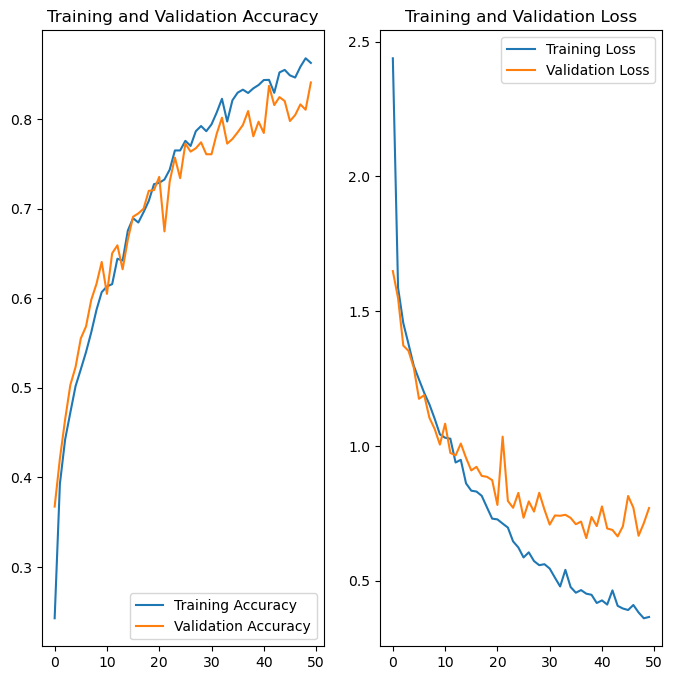

In [383]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?


<div style="background-color: #90EE90; padding: 10px;">
<b>Findings:</b><br>
<ul>
<li>As the training accuracy increases linearly over time, where as the validation accuracy increases in training process.</li>
<li>As the training loss decreases with epochs the validation loss also decreases.</li>
<li>The plots show that gap between training accuracy and validation accuracy have decreased significantly from previous model, and it has achieved around 86% accuracy on the validation set.</li>
<li>The difference in accuracy between training and validation accuracy is very less.</li>
<li>Class rebalancing not only got rid of overfitting it also improved the accuracy from 55% to 86%</li>
</ul>
</div>
